# Introduction to the Harmonic Oscillator

*Note:* Much of this is adapted/copied from https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

This week week we are going to begin studying molecular dynamics, which uses classical mechanics to study molecular systems. Our "hydrogen atom" in this section will be the 1D harmomic oscillator. 

![1D Harmonic Oscillator](ho.png) 

The harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x:

$$F=-kx$$

The potential energy of this system is 

$$V = {1 \over 2}k{x^2}$$

These are sometime rewritten as

$$ F=- \omega_0^2 m x, \text{ }  V(x) = {1 \over 2}  \omega_0^2 m {x^2}$$

Where $\omega_0  = \sqrt {{k \over m}} $

In classical mechanics, our goal is to determine the equations of motion, $x(t),y(t)$, that describe our system. 

In this notebook we will use sympy to solve an second order, ordinary differential equation.

## 1. Solving differential equations with sympy

Soliving differential equations can be tough, and there is not always a set plan on how to proceed. Luckily for us, the harmonic osscillator is the classic second order diffferential eqations.

Consider the following second order differential equation

$$ay(t)''+by(t)'=c$$

where $y(t)'' = {{{d^2}y} \over {dt^2}}$, and $y(t)' = {{{d}y} \over {dt}}$

We can rewrite this as a homogeneous linear differential equations

$$ay(t)''+by(t)'-c=0$$

The goal here is to find $y(t)$, similar to our classical mechanics problems. Lets use sympy to solve this equation

### Second order ordinary differential equation

First we import the sympy library

In [1]:
import sympy as sym

Next we initialize pretty printing

In [2]:
sym.init_printing()

Next we will set our symbols

In [3]:
t,a,b,c=sym.symbols("t,a,b,c")

Now for somehting new. We can define functions using `sym.Function("f")`

In [4]:
y=sym.Function("y")
y(t)

Now, If I want to define a first or second derivative, I can use `sym.diff`

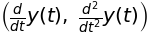

In [5]:
sym.diff(y(t),(t,1)),sym.diff(y(t),(t,2))

My differential equation can be written as follows

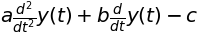

In [6]:
dfeq=a*sym.diff(y(t),(t,2))+b*sym.diff(y(t),(t,1))-c
dfeq

In [7]:
sol = sym.dsolve(dfeq)
sol

The two constants $C_1$ and $C_2$ can be determined by setting boundry conditions.
First, we can set the condition $y(t=0)=y_0$

The next intial condition we will set is $y'(t=0)=v_0$

To setup the equality we want to solve, we are using `sym.Eq`. This function sets up an equaility between a lhs aand rhs of an equation

In [8]:
# sym.Eq example
alpha,beta=sym.symbols("alpha,beta")
sym.Eq(alpha+2,beta)

Back to the actual problem

In [9]:
y0,v0=sym.symbols("y_0,v_0")
ics=[sym.Eq(sol.args[1].subs(t, 0), y0),
     sym.Eq(sol.args[1].diff(t).subs(t, 0), v0)]
ics

We can use this result to first solve for $C_2$ and then solve for $C_1$.
Or we can use sympy to solve this for us.

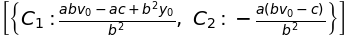

In [10]:
solved_ics=sym.solve(ics)
solved_ics

Substitute the result back into $y(t)$

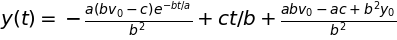

In [11]:
full_sol = sol.subs(solved_ics[0])
full_sol

We can plot this result too. Assume that $a,b,c=1$ and that the starting conditions are $y_0=0,v_0=0$


We will use two sample problems:

* case 1 : initial position is nonzero and initial velocity is zero
* case 2 : initial position is zero and initialvelocity is nonzero


In [12]:
# Print plots
%matplotlib inline

#### Initial velocity set to zero

In [13]:
case1 = sym.simplify(full_sol.subs({y0:0, v0:0, a:1, b:1, c:1}))
case1

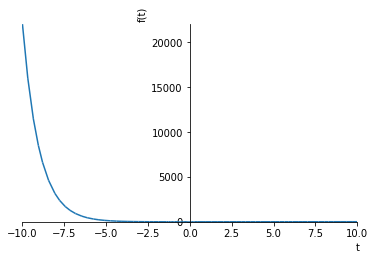

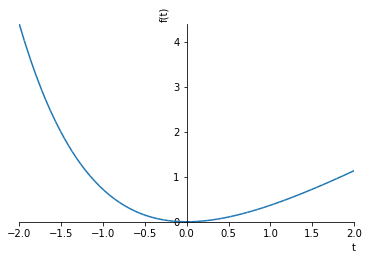

In [14]:
sym.plot(case1.rhs)
sym.plot(case1.rhs,(t,-2,2))

#### Initial velocity set to one

In [15]:
case2 = sym.simplify(full_sol.subs({y0:0, v0:1, a:1, b:1, c:1}))
case2

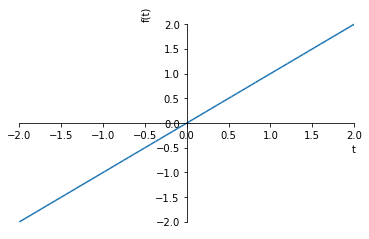

In [16]:
sym.plot(case2.lhs,(t,-2,2))

## Calculate the phase space

As we will see in lecture, the state of our classical systems are defined as points in phase space, a hyperspace defined by ${{\bf{r}}^N},{{\bf{p}}^N}$. We will convert our sympy expression into a numerical function so that we can plot the path of $y(t)$ in phase space $y,y'$.

In [17]:
case1

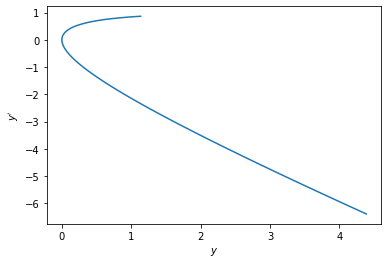

In [18]:
# Import numpy library
import numpy as np

# Make numerical functions out of symbolic expressions
yfunc=sym.lambdify(t,case1.rhs,'numpy')
vfunc=sym.lambdify(t,case1.rhs.diff(t),'numpy')

# Make list of numbers
tlst=np.linspace(-2,2,100)

# Import pyplot
import matplotlib
import matplotlib.pyplot as plt
# Make plot
plt.plot(yfunc(tlst),vfunc(tlst))
plt.xlabel('$y$')
plt.ylabel("$y'$")
plt.show()

### Exercise 1.1 

Change the initial starting conditions and see how that changes the plots. Make three different plots with different starting conditions

In [26]:
#Making initial velocity equal 10 and change initial positions to 5,5,5
case3 = sym.simplify(full_sol.subs({y0:1, v0:10, a:5, b:5, c:5}))
case3

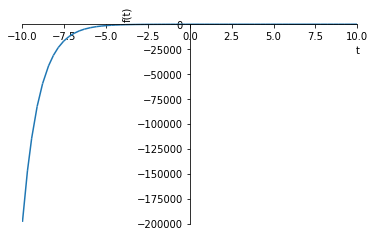

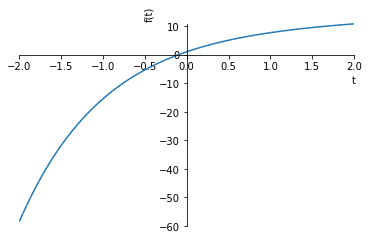

In [28]:
sym.plot(case3.rhs)
sym.plot(case3.rhs,(t,-2,2))

In [29]:
case4 = sym.simplify(full_sol.subs({y0:5, v0:2, a:3, b:4, c:5}))
case4

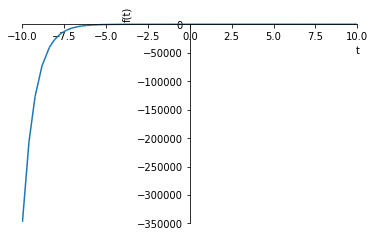

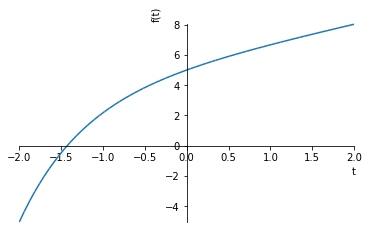

In [30]:
sym.plot(case4.rhs)
sym.plot(case4.rhs,(t,-2,2))

In [31]:
case5 = sym.simplify(full_sol.subs({y0:10, v0:0, a:0, b:1, c:1}))
case5

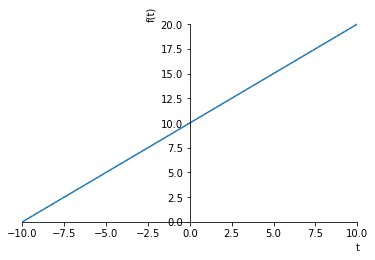

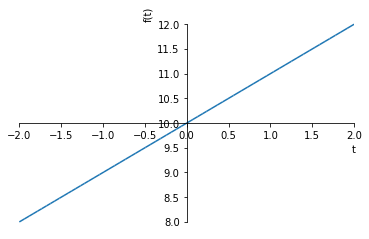

In [33]:
sym.plot(case5.rhs)
sym.plot(case5.rhs,(t,-2,2))

## 2. Harmonic oscillator 

Applying the harmonic oscillator force to Newton's second law leads to the following second order differential equation

$$ F = m a $$

$$ F= - \omega_0^2 m x $$

$$ a = - \omega_0^2 x $$

$$ x(t)'' = - \omega_0^2 x $$

The final expression can be rearranged into a second order homogenous differential equation, and can be solved using the methods we used above

Your goal is determine and plot the equations of motion of a 1D harmomnic oscillator

### Exercise 2.1  

1. Use the methodology above to determine the equations of motion $x(t), v(t)$ for a harmonic ocillator
1. Solve for any constants by using the following initial conditions: $x(0)=x_0, v(0)=v_0$
1. Show expressions for and plot the equations of motion for the following cases:
    1. $x(0)=0, v(0)=0$
    1. $x(0)=0, v(0)>0$
    1. $x(0)>0, v(0)=0$
    1. $x(0)<0, v(0)=0$
1. Plot the phasespace diagram for the harmonic oscillator

In [47]:
# Your code here
m,t,omega=sym.symbols("m,t,omega")
x=sym.Function("x")
x(t)

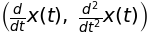

In [57]:
sym.diff(x(t),(t,1)),sym.diff(x(t),(t,2))

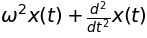

In [62]:
dfeq1=sym.diff(x(t),(t,2))+omega**2*x(t)
dfeq1

In [65]:
sol1 = sym.dsolve(dfeq1)
sol1

In [69]:
x0,v0=sym.symbols("x_0,v_0")
ics1=[sym.Eq(sol1.args[1].subs(t, 0), x0),
     sym.Eq(sol1.args[1].diff(t).subs(t, 0), v0)]
ics1

In [70]:
solved_ics1=sym.solve(ics1)
solved_ics1

In [71]:
full_sol1 = sol.subs(solved_ics1[0])
full_sol1

In [72]:
# Print plots
%matplotlib inline

In [90]:
case_100 = sym.simplify(full_sol1.subs({x0:0, v0:0, omega:1}))
case_100

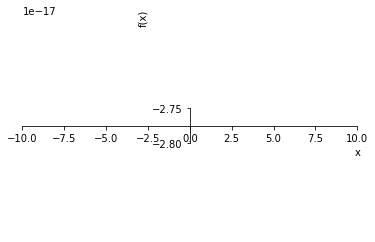

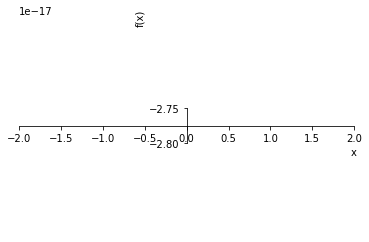

In [83]:
sym.plot(case_100.rhs)
sym.plot(case_100.rhs,(t,-2,2))

In [80]:
case_101 = sym.simplify(full_sol1.subs({x0:0, v0:5, omega:1}))
case_101

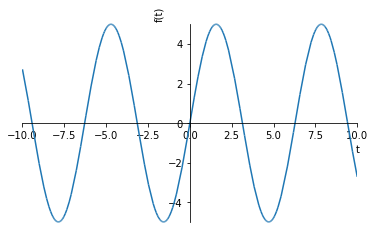

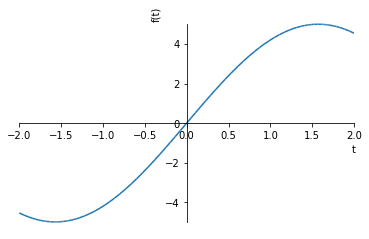

In [82]:
sym.plot(case_101.rhs)
sym.plot(case_101.rhs,(t,-2,2))

In [84]:
case_102 = sym.simplify(full_sol1.subs({x0:5, v0:0, omega:1}))
case_102

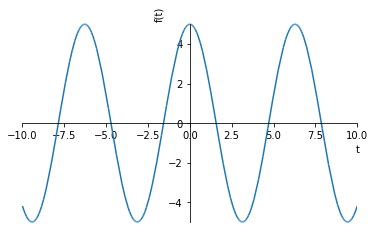

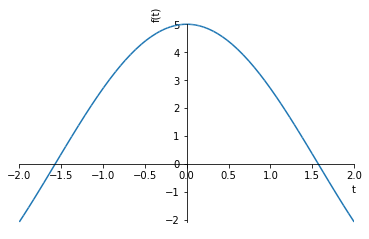

In [85]:
sym.plot(case_102.rhs)
sym.plot(case_102.rhs,(t,-2,2))

In [86]:
case_103 = sym.simplify(full_sol1.subs({x0:-5, v0:0, omega:1}))
case_103

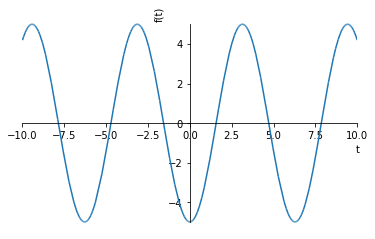

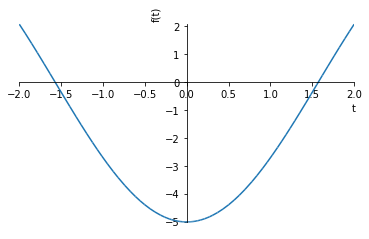

In [87]:
sym.plot(case_103.rhs)
sym.plot(case_103.rhs,(t,-2,2))

In [91]:
case_100

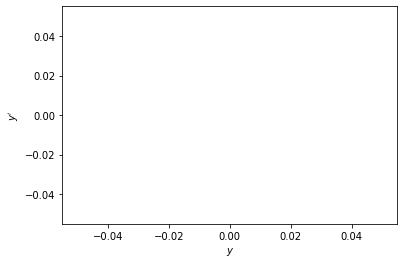

In [95]:
# Import numpy library
import numpy as np

# Make numerical functions out of symbolic expressions
xfunc=sym.lambdify(t,case_100.rhs,'numpy')
vfunc=sym.lambdify(t,case_100.rhs.diff(t),'numpy')

# Make list of numbers
tlst=np.linspace(-2,2,100)

# Import pyplot
import matplotlib
import matplotlib.pyplot as plt
# Make plot
plt.plot(xfunc(tlst),vfunc(tlst))
plt.xlabel('$y$')
plt.ylabel("$y'$")
plt.show()

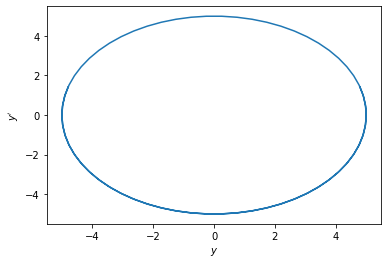

In [98]:
# Import numpy library
import numpy as np

# Make numerical functions out of symbolic expressions
xfunc=sym.lambdify(t,case_101.rhs,'numpy')
vfunc=sym.lambdify(t,case_101.rhs.diff(t),'numpy')

# Make list of numbers
tlst=np.linspace(-5,5,100)

# Import pyplot
import matplotlib
import matplotlib.pyplot as plt
# Make plot
plt.plot(xfunc(tlst),vfunc(tlst))
plt.xlabel('$y$')
plt.ylabel("$y'$")
plt.show()